# Working with structured data in Python using Pandas


## Table of Contents

1. [Introduction](#introduction)<br>
2. [Series and DataFrames](#series)<br>
3. [Cleaning Data](#cleaning)<br>
4. [Selecting Data](#selection)<br>
5. [Merging Data](#merging)<br>
6. [Grouping Data](#grouping)<br>
7. [Visualising Data](#visualise)<br>

<a id="introduction"></a>
## 1. Introduction

A lot of data is **structured data**, which is data that is organized and formatted so it is easily readable, for example a table with variables as columns and records as rows, or key-value pairs in a noSQL database. As long as the data is formatted consistently and has multiple records with numbers, text and dates, you can probably read the data with [Pandas](https://pandas.pydata.org/pandas-docs/stable/index.html), an open-source Python package providing high-performance data manipulation and analysis.

### Data

The data that you will explore in this notebook is about the boroughs in London. Within Greater London there are [32 boroughs](https://en.wikipedia.org/wiki/London_boroughs). You can download the data from [data.gov.uk](https://data.gov.uk/dataset/248f5f04-23cf-4470-9216-0d0be9b877a8/london-borough-profiles-and-atlas) where this description is given:

> The London Borough Profiles help paint a general picture of an area by presenting a range of headline indicator data to help show statistics covering demographic, economic, social and environmental datasets for each borough, alongside relevant comparator areas. 

**Let's start with loading the required Python packages and loading our data into the notebook.**

* To run the code, select the below cell by clicking on it, and then click on the `Run` button at the top of the notebook (or use `Shift+Enter`), to run the cells in the notebook
* The numbers in front of the cells tell you in which order you have run them, for instance `[1]`
* When you see a `[*]` the cell is currently running and `[]` means you have not run the cell yet. Make sure run all of them!

In [1]:
import numpy as np
import pandas as pd

**Read data from a CSV file using the `read_csv` function. Load a file by running the next cell:**

This file is read directly from a URL, but you can replace this with a local path when running this notebook on a local system. When you are using IBM Watson Studio you can also [upload](https://dataplatform.cloud.ibm.com/docs/content/wsj/manage-data/add-data-project.html?linkInPage=true) a file to your Cloud Object Storage, and then [import](https://dataplatform.cloud.ibm.com/docs/content/wsj/manage-data/add-data-project.html?linkInPage=true#os) it by clicking on the file in the menu on the right of the notebook.  

In [2]:
df = pd.read_csv('https://data.london.gov.uk/download/london-borough-profiles/c1693b82-68b1-44ee-beb2-3decf17dc1f8/london-borough-profiles.csv',encoding = 'unicode_escape', sep=',', thousands=',')

Only keep the data from the 32 boroughs by removng the last 5 rows from the DataFrame: 

In [3]:
df = df.drop([33,34,35,36,37])
df.head(35)

,Code,Area_name,Inner/_Outer_London,GLA_Population_Estimate_2017,GLA_Household_Estimate_2017,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017","Proportion_of_population_aged_0-15,_2015","Proportion_of_population_of_working-age,_2015",...,Happiness_score_2011-14_(out_of_10),Anxiety_score_2011-14_(out_of_10),Childhood_Obesity_Prevalance_(%)_2015/16,People_aged_17+_with_diabetes_(%),Mortality_rate_from_causes_considered_preventable_2012/14,Political_control_in_council,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections
0,E09000001,City of London,Inner London,8800,5326,290,30.3,43.2,11.4,73.1,...,6.0,5.6,NaN,2.6,129,.,.,.,.,.
1,E09000002,Barking and Dagenham,Outer London,209000,78188,"3,611",57.9,32.9,27.2,63.1,...,7.1,3.1,28.5,7.3,228,Lab,0,100,0,36.5
2,E09000003,Barnet,Outer London,389600,151423,"8,675",44.9,37.3,21.1,64.9,...,7.4,2.8,20.7,6.0,134,Cons,50.8,.,1.6,40.5
3,E09000004,Bexley,Outer London,244300,97736,"6,058",40.3,39.0,20.6,62.9,...,7.2,3.3,22.7,6.9,164,Cons,71.4,23.8,0,39.6
4,E09000005,Brent,Outer London,332100,121048,"4,323",76.8,35.6,20.9,67.8,...,7.2,2.9,24.3,7.9,169,Lab,9.5,88.9,1.6,36.3
5,E09000006,Bromley,Outer London,327900,140602,"15,013",21.8,40.2,19.9,62.6,...,7.4,3.3,16,5.2,148,Cons,85,11.7,0,40.8
6,E09000007,Camden,Inner London,242500,107654,"2,179",111.3,36.4,17.3,71.0,...,7.1,3.6,21.3,3.9,164,Lab,22.2,74.1,1.9,38.7
7,E09000008,Croydon,Outer London,386500,159010,"8,650",44.7,37.0,22.0,64.9,...,7.2,3.3,24.5,6.5,178,Lab,42.9,57.1,0,38.6
8,E09000009,Ealing,Outer London,351600,132663,"5,554",63.3,36.2,21.4,66.8,...,7.3,3.6,23.8,6.9,164,Lab,17.4,76.8,5.8,41.2
9,E09000010,Enfield,Outer London,333000,130328,"8,083",41.2,36.3,22.8,64.4,...,7.3,2.6,25.2,7.0,152,Lab,34.9,65.1,0,38.2


**Let's take a first look at the data loaded into the notebook**

* With `df.head()` or `df.tail()` you can view the first five or last five lines from the data  
* Add a number between the brackets `()` to specify the number of lines you want to display., e.g. `df.head(2)`
* Use `df.dtypes` to check the different variables and their datatype
* `df.columns` gives a list of all column names
* `len(df)` gives the number of rows
* `df.shape` gives the number of rows and columns

> **Tip**: to add more cells to run additional commands, activate a cell by clicking on it and then click on the '+' button at the top of the notebook. This will add a new cell. Click on the buttons with the upwards and downwards arrows to move the cells up and down to change their order

<div class="alert alert-success">
 <b>EXERCISE</b> <br/> 
 Now let's have a look at the data that was loaded into the notebook. What are we actually looking at? 
    
  Explore some of the following commands:
  <ul>
  <li><font face="Courier">df.head()</font></li>
  <li><font face="Courier">df.tail()</font></li>
  <li><font face="Courier">df.columns</font></li>
  <li><font face="Courier">df.values</font></li>
  <li><font face="Courier">len(df)</font></li>
  <li><font face="Courier">list(df)</font></li>
  </ul>
</div>  


In [4]:
# try the commands here (add as many cells as you need):



<a id="series"></a>
## 2. Series and DataFrames 

A `Series` is a one-dimensional labelled array that can contain of any type (integer, string, float, python objects, etc.).

In [5]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

A `DataFrame` is a two-dimensional data structure, the data consists of rows and columns that you can create a in many ways, by loading a file or using a NumPy array and a date for the index.

<div class="alert alert-info" style="font-size:100%">
<a href="https://numpy.org"> NumPy</a> is a Python library for working with multi-dimensional arrays and matrices with a large collection of mathematical functions to operate on these arrays.
Have a look at this <a href="https://docs.scipy.org/doc/numpy-1.15.0/user/quickstart.html"> NumPy tutorial</a> for an overview.
</div>



Create DataFrame `df1` with `dates` as the index, a 6 by 4 array of random `numbers` as values, and column names A, B, C and D (the index will be explained in the next section):  

In [6]:
dates = pd.date_range('20200101', periods=6)
dates

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06'],
              dtype='datetime64[ns]', freq='D')

In [7]:
numbers = np.random.randn(6, 4)
numbers

array([[-0.27284343, -2.43989708,  0.39690603, -1.39454938],
       [-0.2103841 , -0.92963152,  0.81155837,  0.24294478],
       [ 1.17913921,  0.02795077, -0.54357133, -1.11831737],
       [-0.05835812, -0.1737243 ,  0.31021868, -0.24403804],
       [ 1.25526129, -1.94965289,  1.32965803, -0.76319909],
       [-0.86882468, -1.08415123,  1.05897472,  0.98191877]])

In [8]:
df1 = pd.DataFrame(numbers, index=dates, columns=['A', 'B', 'C', 'D'])
df1

,A,B,C,D
2020-01-01,-0.272843,-2.439897,0.396906,-1.394549
2020-01-02,-0.210384,-0.929632,0.811558,0.242945
2020-01-03,1.179139,0.027951,-0.543571,-1.118317
2020-01-04,-0.058358,-0.173724,0.310219,-0.244038
2020-01-05,1.255261,-1.949653,1.329658,-0.763199
2020-01-06,-0.868825,-1.084151,1.058975,0.981919


Or create a DataFrame by combining the above in one command:

In [9]:
df2 = pd.DataFrame({'A': 1.,
                     'B': pd.Timestamp('20130102'),
                     'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                     'D': np.array([3] * 4, dtype='int32'),
                     'E': pd.Categorical(["test", "train", "test", "train"]),
                     'F': 'foo'})

In [10]:
df2.head()

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


Use `type()` to check the data type of each variable. Below `print` is used to display the data type of all of them used so far:

In [11]:
print('Data type of s is '+str(type(s)))
print('Data type of s is '+str(type(dates)))
print('Data type of s is '+str(type(numbers)))
print('Data type of df is '+str(type(df1)))

Data type of s is <class 'pandas.core.series.Series'>
Data type of s is <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
Data type of s is <class 'numpy.ndarray'>
Data type of df is <class 'pandas.core.frame.DataFrame'>


In [12]:
type(df)

pandas.core.frame.DataFrame

<a id="cleaning"></a>
## 3. Cleaning Data

When exploring data there are always transformations needed to get it in the format you need for your analysis, visualisations or models. Below are only a few examples of the endless possibilities. The best way to learn is to find a dataset and try to answer questions with the data.

First, let's make a copy of the Dataframe loaded from the URL:

In [13]:
boroughs = df.copy()

### Adding an index

Indexing and selecting data is key to data analysis and creating visualizations. For more information on indexing have a look at the [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html).

Set the area code (`Code`) as the index, which will change the table slightly:

In [14]:
boroughs = boroughs.set_index(['Code'])
boroughs.head()

,Area_name,Inner/_Outer_London,GLA_Population_Estimate_2017,GLA_Household_Estimate_2017,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017","Proportion_of_population_aged_0-15,_2015","Proportion_of_population_of_working-age,_2015","Proportion_of_population_aged_65_and_over,_2015",...,Happiness_score_2011-14_(out_of_10),Anxiety_score_2011-14_(out_of_10),Childhood_Obesity_Prevalance_(%)_2015/16,People_aged_17+_with_diabetes_(%),Mortality_rate_from_causes_considered_preventable_2012/14,Political_control_in_council,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections
Code,,,,,,,,,,,,,,,,,,,,,
E09000001,City of London,Inner London,8800,5326,290,30.3,43.2,11.4,73.1,15.5,...,6.0,5.6,NaN,2.6,129,.,.,.,.,.
E09000002,Barking and Dagenham,Outer London,209000,78188,"3,611",57.9,32.9,27.2,63.1,9.7,...,7.1,3.1,28.5,7.3,228,Lab,0,100,0,36.5
E09000003,Barnet,Outer London,389600,151423,"8,675",44.9,37.3,21.1,64.9,14.0,...,7.4,2.8,20.7,6.0,134,Cons,50.8,.,1.6,40.5
E09000004,Bexley,Outer London,244300,97736,"6,058",40.3,39.0,20.6,62.9,16.6,...,7.2,3.3,22.7,6.9,164,Cons,71.4,23.8,0,39.6
E09000005,Brent,Outer London,332100,121048,"4,323",76.8,35.6,20.9,67.8,11.3,...,7.2,2.9,24.3,7.9,169,Lab,9.5,88.9,1.6,36.3


### Adding and deleting columns

Adding a column can be done by creating a new column `new`, which can be dropped using the `drop` function.

In [15]:
boroughs['new'] = 1
boroughs.head()

,Area_name,Inner/_Outer_London,GLA_Population_Estimate_2017,GLA_Household_Estimate_2017,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017","Proportion_of_population_aged_0-15,_2015","Proportion_of_population_of_working-age,_2015","Proportion_of_population_aged_65_and_over,_2015",...,Anxiety_score_2011-14_(out_of_10),Childhood_Obesity_Prevalance_(%)_2015/16,People_aged_17+_with_diabetes_(%),Mortality_rate_from_causes_considered_preventable_2012/14,Political_control_in_council,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections,new
Code,,,,,,,,,,,,,,,,,,,,,
E09000001,City of London,Inner London,8800,5326,290,30.3,43.2,11.4,73.1,15.5,...,5.6,NaN,2.6,129,.,.,.,.,.,1
E09000002,Barking and Dagenham,Outer London,209000,78188,"3,611",57.9,32.9,27.2,63.1,9.7,...,3.1,28.5,7.3,228,Lab,0,100,0,36.5,1
E09000003,Barnet,Outer London,389600,151423,"8,675",44.9,37.3,21.1,64.9,14.0,...,2.8,20.7,6.0,134,Cons,50.8,.,1.6,40.5,1
E09000004,Bexley,Outer London,244300,97736,"6,058",40.3,39.0,20.6,62.9,16.6,...,3.3,22.7,6.9,164,Cons,71.4,23.8,0,39.6,1
E09000005,Brent,Outer London,332100,121048,"4,323",76.8,35.6,20.9,67.8,11.3,...,2.9,24.3,7.9,169,Lab,9.5,88.9,1.6,36.3,1


In [16]:
boroughs = boroughs.drop(columns='new')
boroughs.head()

,Area_name,Inner/_Outer_London,GLA_Population_Estimate_2017,GLA_Household_Estimate_2017,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017","Proportion_of_population_aged_0-15,_2015","Proportion_of_population_of_working-age,_2015","Proportion_of_population_aged_65_and_over,_2015",...,Happiness_score_2011-14_(out_of_10),Anxiety_score_2011-14_(out_of_10),Childhood_Obesity_Prevalance_(%)_2015/16,People_aged_17+_with_diabetes_(%),Mortality_rate_from_causes_considered_preventable_2012/14,Political_control_in_council,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections
Code,,,,,,,,,,,,,,,,,,,,,
E09000001,City of London,Inner London,8800,5326,290,30.3,43.2,11.4,73.1,15.5,...,6.0,5.6,NaN,2.6,129,.,.,.,.,.
E09000002,Barking and Dagenham,Outer London,209000,78188,"3,611",57.9,32.9,27.2,63.1,9.7,...,7.1,3.1,28.5,7.3,228,Lab,0,100,0,36.5
E09000003,Barnet,Outer London,389600,151423,"8,675",44.9,37.3,21.1,64.9,14.0,...,7.4,2.8,20.7,6.0,134,Cons,50.8,.,1.6,40.5
E09000004,Bexley,Outer London,244300,97736,"6,058",40.3,39.0,20.6,62.9,16.6,...,7.2,3.3,22.7,6.9,164,Cons,71.4,23.8,0,39.6
E09000005,Brent,Outer London,332100,121048,"4,323",76.8,35.6,20.9,67.8,11.3,...,7.2,2.9,24.3,7.9,169,Lab,9.5,88.9,1.6,36.3


As not all columns are needed, let's remove some. If you are interested in any of these, change the code and do not remove the columns.

In [17]:
boroughs = boroughs.drop(columns=['GLA_Household_Estimate_2017',
       'Proportion_of_population_aged_0-15,_2015',
       'Proportion_of_population_of_working-age,_2015',
       'Proportion_of_population_aged_65_and_over,_2015',
       'Net_internal_migration_(2015)', 'Net_international_migration_(2015)',
       'Net_natural_change_(2015)',
       '%_of_largest_migrant_population_(2011)',
       'Second_largest_migrant_population_by_country_of_birth_(2011)',
       '%_of_second_largest_migrant_population_(2011)',
       'Third_largest_migrant_population_by_country_of_birth_(2011)',
       '%_of_third_largest_migrant_population_(2011)',
       '%_of_population_from_BAME_groups_(2016)',
       '%_people_aged_3+_whose_main_language_is_not_English_(2011_Census)',
       'Overseas_nationals_entering_the_UK_(NINo),_(2015/16)',
       'Largest_migrant_population_arrived_during_2015/16',
       'Second_largest_migrant_population_arrived_during_2015/16',
       'Third_largest_migrant_population_arrived_during_2015/16',
       'Male_employment_rate_(2015)',
       'Female_employment_rate_(2015)', 'Unemployment_rate_(2015)',
       'Youth_Unemployment_(claimant)_rate_18-24_(Dec-15)',
       'Proportion_of_16-18_year_olds_who_are_NEET_(%)_(2014)',
       'Proportion_of_the_working-age_population_who_claim_out-of-work_benefits_(%)_(May-2016)',
       '%_working-age_with_a_disability_(2015)',
       'Proportion_of_working_age_people_with_no_qualifications_(%)_2015',
       'Proportion_of_working_age_with_degree_or_equivalent_and_above_(%)_2015',
       'Gross_Annual_Pay,_(2016)',
       'Modelled_Household_median_income_estimates_2012/13',
       '%_adults_that_volunteered_in_past_12_months_(2010/11_to_2012/13)',
       'Number_of_jobs_by_workplace_(2014)',
       '%_of_employment_that_is_in_public_sector_(2014)', 'Jobs_Density,_2015',
       'Number_of_active_businesses,_2015',
       'Two-year_business_survival_rates_(started_in_2013)',
       'Crime_rates_per_thousand_population_2014/15',
       'Fires_per_thousand_population_(2014)',
       'Ambulance_incidents_per_hundred_population_(2014)',
       'Average_Band_D_Council_Tax_charge_(£),_2015/16',
       'New_Homes_(net)_2015/16_(provisional)',
       'Homes_Owned_outright,_(2014)_%',
       'Being_bought_with_mortgage_or_loan,_(2014)_%',
       'Rented_from_Local_Authority_or_Housing_Association,_(2014)_%',
       'Rented_from_Private_landlord,_(2014)_%',
       'Total_carbon_emissions_(2014)',
       'Household_Waste_Recycling_Rate,_2014/15',
       'Number_of_cars,_(2011_Census)',
       'Number_of_cars_per_household,_(2011_Census)',
       '%_of_adults_who_cycle_at_least_once_per_month,_2014/15',
       'Average_Public_Transport_Accessibility_score,_2014',
       'Achievement_of_5_or_more_A*-_C_grades_at_GCSE_or_equivalent_including_English_and_Maths,_2013/14',
       'Rates_of_Children_Looked_After_(2016)',
       '%_of_pupils_whose_first_language_is_not_English_(2015)',
       '%_children_living_in_out-of-work_households_(2015)',
       'Male_life_expectancy,_(2012-14)', 'Female_life_expectancy,_(2012-14)',
       'Teenage_conception_rate_(2014)',
       'Life_satisfaction_score_2011-14_(out_of_10)',
       'Worthwhileness_score_2011-14_(out_of_10)',
       'Anxiety_score_2011-14_(out_of_10)',
       'Childhood_Obesity_Prevalance_(%)_2015/16',
       'People_aged_17+_with_diabetes_(%)',
       'Mortality_rate_from_causes_considered_preventable_2012/14',
       'Proportion_of_seats_won_by_Conservatives_in_2014_election',
       'Proportion_of_seats_won_by_Labour_in_2014_election',
       'Proportion_of_seats_won_by_Lib_Dems_in_2014_election'])

In [18]:
boroughs.columns

Index(['Area_name', 'Inner/_Outer_London', 'GLA_Population_Estimate_2017',
       'Inland_Area_(Hectares)', 'Population_density_(per_hectare)_2017',
       'Average_Age,_2017', '%_of_resident_population_born_abroad_(2015)',
       'Largest_migrant_population_by_country_of_birth_(2011)',
       'New_migrant_(NINo)_rates,_(2015/16)', 'Employment_rate_(%)_(2015)',
       'Gross_Annual_Pay_-_Male_(2016)', 'Gross_Annual_Pay_-_Female_(2016)',
       'Median_House_Price,_2015', '%_of_area_that_is_Greenspace,_2005',
       'Happiness_score_2011-14_(out_of_10)', 'Political_control_in_council',
       'Turnout_at_2014_local_elections'],
      dtype='object')

<a id="Renaming"></a>

You can change names of columns using `rename`:

In [19]:
boroughs.rename(columns={'Area_name':'Name',
                'Inner/_Outer_London':'Inner/Outer',
                'GLA_Population_Estimate_2017':'Population',
                'Inland_Area_(Hectares)':'Area (ha)',
                'Average_Age,_2017':'Average Age',
                'Political_control_in_council':'Political control',
                'Population_density_(per_hectare)_2017':'Population density (/ha)',
                'New_migrant_(NINo)_rates,_(2015/16)':'New migrant rates',
                'Happiness_score_2011-14_(out_of_10)':'Happiness score',
                '%_of_resident_population_born_abroad_(2015)':'Population born abroad (%)',
                'Employment_rate_(%)_(2015)':'Employment rate (%)',
                'Turnout_at_2014_local_elections':'Turnout at local elections',
                'Median_House_Price,_2015':'Median House Price',
                "Largest_migrant_population_by_country_of_birth_(2011)":'Largest migrant population',
                'Gross_Annual_Pay_-_Female_(2016)':'Gross Pay (Female)',
                'Gross_Annual_Pay_-_Male_(2016)':'Gross Pay (Male)',
                '%_of_area_that_is_Greenspace,_2005':'Greenspace (%)'},
                 inplace=True)

In [20]:
boroughs.columns

Index(['Name', 'Inner/Outer', 'Population', 'Area (ha)',
       'Population density (/ha)', 'Average Age', 'Population born abroad (%)',
       'Largest migrant population', 'New migrant rates',
       'Employment rate (%)', 'Gross Pay (Male)', 'Gross Pay (Female)',
       'Median House Price', 'Greenspace (%)', 'Happiness score',
       'Political control', 'Turnout at local elections'],
      dtype='object')

In [21]:
boroughs.head()

,Name,Inner/Outer,Population,Area (ha),Population density (/ha),Average Age,Population born abroad (%),Largest migrant population,New migrant rates,Employment rate (%),Gross Pay (Male),Gross Pay (Female),Median House Price,Greenspace (%),Happiness score,Political control,Turnout at local elections
Code,,,,,,,,,,,,,,,,,
E09000001,City of London,Inner London,8800,290,30.3,43.2,.,United States,152.2,64.6,.,.,799999,4.8,6.0,.,.
E09000002,Barking and Dagenham,Outer London,209000,"3,611",57.9,32.9,37.8,Nigeria,59.1,65.8,30104,24602,243500,33.6,7.1,Lab,36.5
E09000003,Barnet,Outer London,389600,"8,675",44.9,37.3,35.2,India,53.1,68.5,36475,31235,445000,41.3,7.4,Cons,40.5
E09000004,Bexley,Outer London,244300,"6,058",40.3,39.0,16.1,Nigeria,14.4,75.1,37881,28924,275000,31.7,7.2,Cons,39.6
E09000005,Brent,Outer London,332100,"4,323",76.8,35.6,53.9,India,100.9,69.5,30129,29600,407250,21.9,7.2,Lab,36.3


### Further Data Cleaning

**Things to check:**

* Is the data tidy: each variable forms a column, each observation forms a row and  each type of observational unit forms a table.
* Are all columns in the right data format?
* Are there missing values?
* Are there unrealistic outliers?

Get a quick overview of the numeric data using the `.describe()` function. If any of the numeric columns are missing this is a probably because of a wrong data type.

In [22]:
boroughs.describe()

,Population,Average Age,New migrant rates,Employment rate (%),Happiness score
count,33.000000,33.000000,33.000000,33.000000,33.000000
mean,267739.393939,36.375758,55.330303,72.715152,7.209091
std,75383.345058,2.487849,29.414659,4.219384,0.249203
min,8800.000000,31.400000,14.400000,64.600000,6.000000
25%,231200.000000,35.000000,37.600000,69.200000,7.200000
50%,276200.000000,36.200000,53.500000,73.100000,7.200000
75%,321000.000000,37.700000,66.200000,75.400000,7.300000
max,389600.000000,43.200000,152.200000,79.600000,7.600000


When looking at the `Turnout at local elections` columns you can see a `.`, this needs to be replaced to a missing value. Change them all with `replace`:

In [23]:
boroughs = boroughs.replace('.', float('NaN'))

Check if all datatypes are as you expect with `dtypes`:

In [24]:
boroughs.dtypes

Name                           object
Inner/Outer                    object
Population                      int64
Area (ha)                      object
Population density (/ha)       object
Average Age                   float64
Population born abroad (%)     object
Largest migrant population     object
New migrant rates             float64
Employment rate (%)           float64
Gross Pay (Male)               object
Gross Pay (Female)             object
Median House Price             object
Greenspace (%)                 object
Happiness score               float64
Political control              object
Turnout at local elections     object
dtype: object

Except for `Name`,`Inner/Outer `, `Largest migration population` and `Political control`, all columns should be numeric (`float64` or `int64`). Change the data type to numeric with `to_numeric`:

In [25]:
boroughs['Population density (/ha)'] = pd.to_numeric(boroughs['Population density (/ha)'])
boroughs['Population born abroad (%)'] = pd.to_numeric(boroughs['Population born abroad (%)'])
boroughs['Gross Pay (Male)'] = pd.to_numeric(boroughs['Gross Pay (Male)'])
boroughs['Gross Pay (Female)'] = pd.to_numeric(boroughs['Gross Pay (Female)'])
boroughs['Median House Price'] = pd.to_numeric(boroughs['Median House Price'])
boroughs['Greenspace (%)'] = pd.to_numeric(boroughs['Greenspace (%)'])
boroughs['Turnout at local elections'] = pd.to_numeric(boroughs['Turnout at local elections'])

boroughs['Area (ha)'] = boroughs['Area (ha)'].str.replace(',', '')
boroughs['Area (ha)'] = pd.to_numeric(boroughs['Area (ha)'])

boroughs.dtypes

Name                           object
Inner/Outer                    object
Population                      int64
Area (ha)                       int64
Population density (/ha)      float64
Average Age                   float64
Population born abroad (%)    float64
Largest migrant population     object
New migrant rates             float64
Employment rate (%)           float64
Gross Pay (Male)              float64
Gross Pay (Female)            float64
Median House Price              int64
Greenspace (%)                float64
Happiness score               float64
Political control              object
Turnout at local elections    float64
dtype: object

<a id="selection"></a>
## 4. Selecting Data


Access single or groups of rows and columns with labels using `.loc[]`. (This only works for the column that was set to the index):

In [26]:
boroughs.loc['E09000001', 'Area (ha)']

290

In [27]:
boroughs.loc['E09000001':'E09000004', ['Area (ha)', 'Average Age']]

,Area (ha),Average Age
Code,,
E09000001,290,43.2
E09000002,3611,32.9
E09000003,8675,37.3
E09000004,6058,39.0


Or select by position with `.iloc[]`. Select a single row, multiple rows (or columns) at particular positions in the index. This function is integer based (from 0 to length-1 of the axis):

In [28]:
boroughs.iloc[0]

Name                          City of London
Inner/Outer                     Inner London
Population                              8800
Area (ha)                                290
Population density (/ha)                30.3
Average Age                             43.2
Population born abroad (%)               NaN
Largest migrant population     United States
New migrant rates                      152.2
Employment rate (%)                     64.6
Gross Pay (Male)                         NaN
Gross Pay (Female)                       NaN
Median House Price                    799999
Greenspace (%)                           4.8
Happiness score                            6
Political control                        NaN
Turnout at local elections               NaN
Name: E09000001, dtype: object

In [29]:
boroughs.iloc[:,1]

Code
E09000001    Inner London
E09000002    Outer London
E09000003    Outer London
E09000004    Outer London
E09000005    Outer London
E09000006    Outer London
E09000007    Inner London
E09000008    Outer London
E09000009    Outer London
E09000010    Outer London
E09000011    Outer London
E09000012    Inner London
E09000013    Inner London
E09000014    Inner London
E09000015    Outer London
E09000016    Outer London
E09000017    Outer London
E09000018    Outer London
E09000019    Inner London
E09000020    Inner London
E09000021    Outer London
E09000022    Inner London
E09000023    Inner London
E09000024    Outer London
E09000025    Inner London
E09000026    Outer London
E09000027    Outer London
E09000028    Inner London
E09000029    Outer London
E09000030    Inner London
E09000031    Outer London
E09000032    Inner London
E09000033    Inner London
Name: Inner/Outer, dtype: object

In [30]:
boroughs.iloc[:,0:2]

,Name,Inner/Outer
Code,,
E09000001,City of London,Inner London
E09000002,Barking and Dagenham,Outer London
E09000003,Barnet,Outer London
E09000004,Bexley,Outer London
E09000005,Brent,Outer London
E09000006,Bromley,Outer London
E09000007,Camden,Inner London
E09000008,Croydon,Outer London
E09000009,Ealing,Outer London


In [31]:
boroughs.iloc[2:4,0:2]

,Name,Inner/Outer
Code,,
E09000003,Barnet,Outer London
E09000004,Bexley,Outer London


All the above examples can be used to create a new DataFrame. Or create a new DataFrame from 2 columns:

In [32]:
boroughs2 = boroughs[['Area (ha)', 'Average Age']]
boroughs2.head()

,Area (ha),Average Age
Code,,
E09000001,290,43.2
E09000002,3611,32.9
E09000003,8675,37.3
E09000004,6058,39.0
E09000005,4323,35.6


### Filtering

Selecting rows based on a certain condition can be done with Boolean indexing. This uses the actual values of the data in the DataFrame as opposed to the row/column labels or index positions.

In [33]:
boroughs['Average Age'] > 39

Code
E09000001     True
E09000002    False
E09000003    False
E09000004    False
E09000005    False
E09000006     True
E09000007    False
E09000008    False
E09000009    False
E09000010    False
E09000011    False
E09000012    False
E09000013    False
E09000014    False
E09000015    False
E09000016     True
E09000017    False
E09000018    False
E09000019    False
E09000020     True
E09000021    False
E09000022    False
E09000023    False
E09000024    False
E09000025    False
E09000026    False
E09000027    False
E09000028    False
E09000029    False
E09000030    False
E09000031    False
E09000032    False
E09000033    False
Name: Average Age, dtype: bool

When you want to select the rows and see all the data add `boroughs[]` around your function:

In [34]:
boroughs[boroughs['Average Age'] > 39]

,Name,Inner/Outer,Population,Area (ha),Population density (/ha),Average Age,Population born abroad (%),Largest migrant population,New migrant rates,Employment rate (%),Gross Pay (Male),Gross Pay (Female),Median House Price,Greenspace (%),Happiness score,Political control,Turnout at local elections
Code,,,,,,,,,,,,,,,,,
E09000001,City of London,Inner London,8800,290,30.3,43.2,NaN,United States,152.2,64.6,NaN,NaN,799999,4.8,6.0,NaN,NaN
E09000006,Bromley,Outer London,327900,15013,21.8,40.2,18.3,India,14.4,75.3,42026.0,32491.0,374975,57.8,7.4,Cons,40.8
E09000016,Havering,Outer London,254300,11235,22.6,40.3,10.9,Ireland,17.0,76.5,36539.0,27455.0,287500,59.3,7.2,No Overall Control,43.1
E09000020,Kensington and Chelsea,Inner London,159000,1212,131.1,39.3,51.9,United States,66.2,68.2,NaN,NaN,1200000,15.1,7.6,Cons,29.8


You can combine different columns using `&`, `|` and `==` operators:

In [35]:
boroughs[(boroughs['Average Age'] > 39) & (boroughs['Political control'] == 'Cons')]

,Name,Inner/Outer,Population,Area (ha),Population density (/ha),Average Age,Population born abroad (%),Largest migrant population,New migrant rates,Employment rate (%),Gross Pay (Male),Gross Pay (Female),Median House Price,Greenspace (%),Happiness score,Political control,Turnout at local elections
Code,,,,,,,,,,,,,,,,,
E09000006,Bromley,Outer London,327900,15013,21.8,40.2,18.3,India,14.4,75.3,42026.0,32491.0,374975,57.8,7.4,Cons,40.8
E09000020,Kensington and Chelsea,Inner London,159000,1212,131.1,39.3,51.9,United States,66.2,68.2,NaN,NaN,1200000,15.1,7.6,Cons,29.8


In [36]:
boroughs[(boroughs['Political control'] == 'Lab') | (boroughs['Political control'] == 'Lib Dem')]

,Name,Inner/Outer,Population,Area (ha),Population density (/ha),Average Age,Population born abroad (%),Largest migrant population,New migrant rates,Employment rate (%),Gross Pay (Male),Gross Pay (Female),Median House Price,Greenspace (%),Happiness score,Political control,Turnout at local elections
Code,,,,,,,,,,,,,,,,,
E09000002,Barking and Dagenham,Outer London,209000,3611,57.9,32.9,37.8,Nigeria,59.1,65.8,30104.0,24602.0,243500,33.6,7.1,Lab,36.5
E09000005,Brent,Outer London,332100,4323,76.8,35.6,53.9,India,100.9,69.5,30129.0,29600.0,407250,21.9,7.2,Lab,36.3
E09000007,Camden,Inner London,242500,2179,111.3,36.4,41.4,United States,60.7,69.2,NaN,36632.0,700000,24.8,7.1,Lab,38.7
E09000008,Croydon,Outer London,386500,8650,44.7,37.0,29.4,India,32.3,75.4,35839.0,29819.0,300000,37.1,7.2,Lab,38.6
E09000009,Ealing,Outer London,351600,5554,63.3,36.2,47.4,India,65.2,72.7,32185.0,29875.0,430000,30.9,7.3,Lab,41.2
E09000010,Enfield,Outer London,333000,8083,41.2,36.3,35.0,Turkey,43.8,73.0,35252.0,30222.0,320000,45.6,7.3,Lab,38.2
E09000011,Greenwich,Outer London,280100,4733,59.2,35.0,35.4,Nigeria,37.6,72.1,35596.0,29833.0,340000,34.4,7.2,Lab,37.3
E09000012,Hackney,Inner London,274300,1905,144.0,33.1,35.8,Turkey,46.0,69.0,NaN,31919.0,485000,23.2,7.0,Lab,39.4
E09000013,Hammersmith and Fulham,Inner London,185300,1640,113.0,35.7,43.2,France,71.4,77.5,43845.0,34808.0,730000,19.1,7.2,Lab,37.6


<div class="alert alert-success">
 <b>EXERCISE</b> <br/> 
 With the above commands you can now start exploring the data some more. Answer the following questions by writing a little code (add as many cells as you need):
  <ol>
  <li>Which borough has the largest population density per hectare? </li>  
  <li>What are the maximum and minimum number of new migrants? And for which boroughs?</li>   
  <li> Which borough is happiest? </li>
  
 </ol>  
</div>  


> *Tips*: 
- Find the maximum of a row with for instance `boroughs['Population'].max()` 
- Extract the value from a cell in a DataFrame with `.value[]`
- Print a value with `print()` for instance: `print(boroughs['area'][0])` for the first row. If you calculate multiple values in one cell you will need this, else the answers will not be displayed.
- To extract an entire row use `idxmax()` which returns column with maximum value, and `.loc[]` to return row of the index
- To see the answer uncomment the line in the cell that contains `%load` (by deleting the `#`) and then run the cell, but try to find your own solution first in the cell above the solution!

**Which borough has the largest population density per hectare?**

In [37]:
# your answer:


In [ ]:
# %load https://raw.githubusercontent.com/IBM/python-and-analytics/master/data/answers/answer1.py
boroughs[boroughs['Population density (/ha)'] == boroughs['Population density (/ha)'].max()]


**What are the maximum and minimum number of new migrants? And for which boroughs?**

In [39]:
# your answer:


In [ ]:
# %load https://raw.githubusercontent.com/IBM/python-and-analytics/master/data/answers/answer2.py
print (boroughs['New migrant rates'].min())
print (boroughs['Name'][boroughs['New migrant rates'] == boroughs['New migrant rates'].min()])

print (boroughs['New migrant rates'].max())
print (boroughs['Name'][boroughs['New migrant rates'] == boroughs['New migrant rates'].max()])


**Which borough is happiest?**

In [41]:
# your answer:


In [ ]:
# %load https://raw.githubusercontent.com/IBM/python-and-analytics/master/data/answers/answer3.py
boroughs['Name'].loc[boroughs['Happiness score'].idxmax()]


<a id="merging"></a>
## 5. Merging Data

Pandas has several different options to combine or merge data. The [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html) has lots of examples. 

Let's create two new Dataframes to explore this: `cities` and `cities2`

In [43]:
data = {'city':       ['London','Manchester','Birmingham','Leeds','Glasgow'],
        'population': [9787426,  2553379,     2440986,    1777934,1209143],
        'area':       [1737.9,   630.3,       598.9,      487.8,  368.5 ]}
cities = pd.DataFrame(data)

data2 = {'city':       ['Liverpool','Southampton'],
        'population': [864122,  855569],
        'area':       [199.6,   192.0]}
cities2 = pd.DataFrame(data2)

Use `append()` to combine these Dataframes:

In [44]:
cities = cities.append(cities2)
cities

,city,population,area
0,London,9787426,1737.9
1,Manchester,2553379,630.3
2,Birmingham,2440986,598.9
3,Leeds,1777934,487.8
4,Glasgow,1209143,368.5
0,Liverpool,864122,199.6
1,Southampton,855569,192.0


In [45]:
data = {'city': ['London','Manchester','Birmingham','Leeds','Glasgow'],
        'density': [5630,4051,4076,3645,3390]}
cities3 = pd.DataFrame(data)

In [46]:
cities3

,city,density
0,London,5630
1,Manchester,4051
2,Birmingham,4076
3,Leeds,3645
4,Glasgow,3390


An extra column can be added with `.merge()` with an outer join using the city names:

In [47]:
cities = pd.merge(cities, cities3, how='outer', sort=True,on='city')
cities

,city,population,area,density
0,Birmingham,2440986,598.9,4076.0
1,Glasgow,1209143,368.5,3390.0
2,Leeds,1777934,487.8,3645.0
3,Liverpool,864122,199.6,NaN
4,London,9787426,1737.9,5630.0
5,Manchester,2553379,630.3,4051.0
6,Southampton,855569,192.0,NaN


<a id="grouping"></a>
## 6. Grouping Data

Grouping data is a quick way to calculate values for classes in your DataFrame. 

In [48]:
boroughs.groupby(['Inner/Outer']).mean()

,Population,Area (ha),Population density (/ha),Average Age,Population born abroad (%),New migrant rates,Employment rate (%),Gross Pay (Male),Gross Pay (Female),Median House Price,Greenspace (%),Happiness score,Turnout at local elections
Inner/Outer,,,,,,,,,,,,,
Inner London,252550.000000,2280.5,110.850000,35.550000,40.715385,69.514286,71.571429,38580.714286,32674.909091,600321.357143,20.985714,7.135714,37.446154
Outer London,278931.578947,6594.0,47.673684,36.984211,33.636842,44.878947,73.557895,35668.125000,29986.666667,366102.315789,39.094737,7.263158,39.794737


When you have multiple categorial variables you can create a nested index:

In [49]:
boroughs.groupby(['Inner/Outer','Political control']).sum().head(8)

Population  Area (ha)  \
Inner/Outer  Political control                            
Inner London Cons                     722100       6787   
             Lab                     2500800      22872   
             Tower Hamlets First      304000       1978   
Outer London Cons                    1635500      50783   
             Lab                     3207300      58883   
             Lib Dem                  202600       4385   
             No Overall Control       254300      11235   

                                  Population density (/ha)  Average Age  \
Inner/Outer  Political control                                            
Inner London Cons                                    337.5        112.0   
             Lab                                    1030.4        311.1   
             Tower Hamlets First                     153.7         31.4   
Outer London Cons                                    214.5        228.8   
             Lab                                     622.5        394.7   
             Lib Dem                                  46.2         38.9   
             No Overall Control                       22.6         40.3   

                                  Population born abroad (%)  \
Inner/Outer  Political control                                 
Inner London Cons                                      134.5   
             Lab                                       356.2   
             Tower Hamlets First                        38.6   
Outer London Cons                                      155.5   
             Lab                                       449.6   
             Lib Dem                                    23.1   
             No Overall Control                         10.9   

                                  New migrant rates  Employment rate (%)  \
Inner/Outer  Political control                                             
Inner London Cons                             181.7                212.6   
             Lab                              558.8                654.4   
             Tower Hamlets First               80.5                 70.4   
Outer London Cons                             165.8                446.1   
             Lab                              653.8                796.8   
             Lib Dem                           16.1                 78.2   
             No Overall Control                17.0                 76.5   

                                  Gross Pay (Male)  Gross Pay (Female)  \
Inner/Outer  Political control                                           
Inner London Cons                          46627.0             75379.0   
             Lab                          184977.0            251388.0   
             Tower Hamlets First           38461.0             32657.0   
Outer London Cons                         193777.0            193327.0   
             Lab                          303738.0            290438.0   
             Lib Dem                       36636.0             28540.0   
             No Overall Control            36539.0             27455.0   

                                  Median House Price  Greenspace (%)  \
Inner/Outer  Political control                                         
Inner London Cons                            2677000            80.2   
             Lab                             4512500           193.6   
             Tower Hamlets First              415000            15.2   
Outer London Cons                            2429975           267.2   
             Lab                             3918469           384.3   
             Lib Dem                          320000            32.0   
             No Overall Control               287500            59.3   

                                  Happiness score  Turnout at local elections  
Inner/Outer  Political control                                                 
Inner London Cons                            22.1                        99.0  
        

<a id="visualise"></a>
## 7. Visualising Data

Pandas uses [`Matplotlib`](https://matplotlib.org/users/index.html) as the default for visualisations. 

Import the package and also add the magic line starting with `%` to output the charts within the notebook:

In [50]:
import matplotlib.pyplot as plt

%matplotlib inline

In [51]:
boroughs = boroughs.reset_index()

The default plot is a line chart that uses the index for the x-axis:

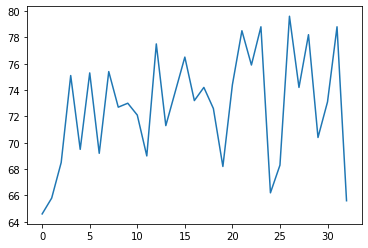

In [52]:
boroughs['Employment rate (%)'].plot();

To create a plot that makes more sense for this data have a look at the [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) for all options. 

For the above example, a histogram might work better. You can change the number of `bins` to get the desired output:

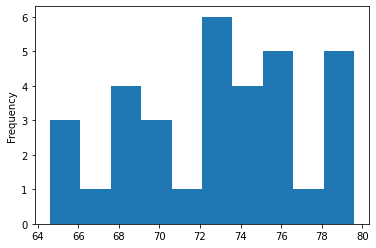

In [53]:
boroughs['Employment rate (%)'].plot.hist(bins=10);

Change the size of the histogram with the `figsize` option:

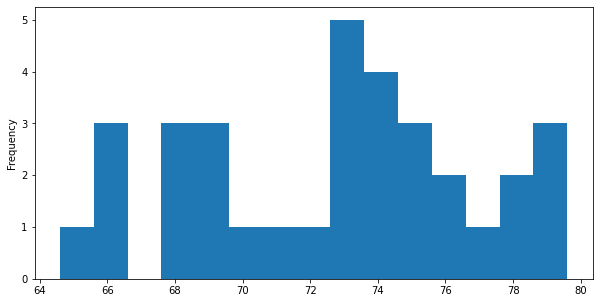

In [54]:
boroughs['Employment rate (%)'].plot.hist(bins=15,figsize=(10,5));

Within the plot command you can select the data directly. The below histogram shows the Employment rate for Outer London only:

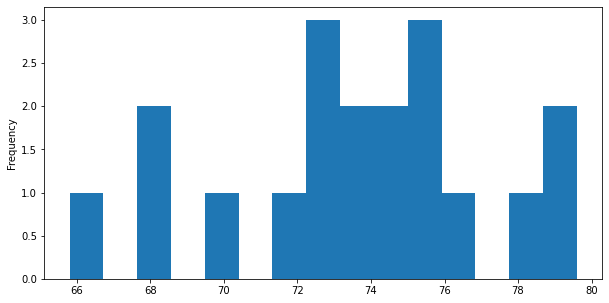

In [55]:
boroughs['Employment rate (%)'][boroughs['Inner/Outer']=='Outer London'].plot.hist(bins=15,figsize=(10,5));

To add the Employment rate for Inner London, repeat the plot command with a different selection of the data:

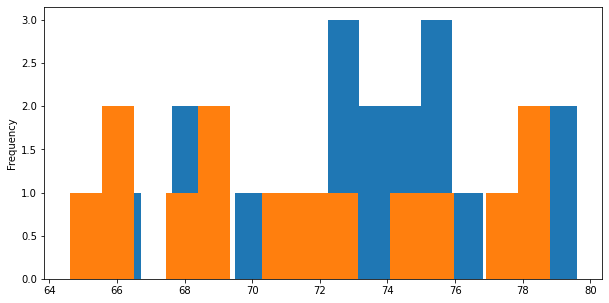

In [56]:
boroughs['Employment rate (%)'][boroughs['Inner/Outer']=='Outer London'].plot.hist(bins=15,figsize=(10,5));
boroughs['Employment rate (%)'][boroughs['Inner/Outer']=='Inner London'].plot.hist(bins=15,figsize=(10,5));

The above plot is difficult to read as the histograms have overlapped. You can fix this by changing the colours and making them transparant. 
    
To add a legend each histogram needs to be assigned to an object `ax`. With `legend()` you can then add a legend. With `plt.xlabel()` you can also add a label for the x-axis (this works similar for the y-axis):

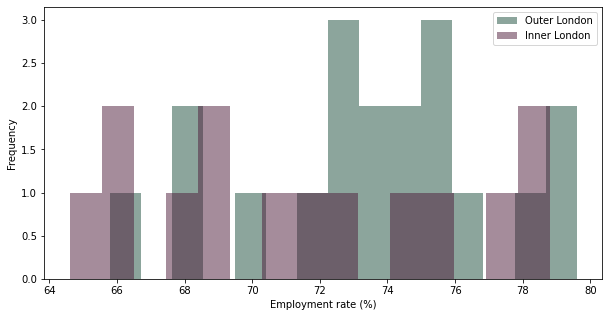

In [57]:
ax = boroughs['Employment rate (%)'][boroughs['Inner/Outer']=='Outer London'].plot.hist(
    bins=15,figsize=(10,5),alpha=0.5,color='#1A4D3B');
ax = boroughs['Employment rate (%)'][boroughs['Inner/Outer']=='Inner London'].plot.hist(
    bins=15,figsize=(10,5),alpha=0.5,color='#4D1A39');
ax.legend(['Outer London','Inner London'])
plt.xlabel('Employment rate (%)');

There are various options available to change every aspect of your chart. Below are some examples to get you started.
        
**Go ahead and create new charts and customise the options.** 

Especially the next one can be improved on to make it look better:

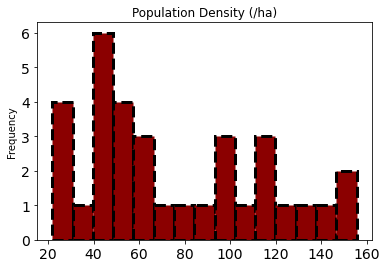

In [58]:
boroughs['Population density (/ha)'].plot.hist(
    bins=15, 
    title="Population Density (/ha)",
    legend=False,
    fontsize=14,
    grid=False,
    linestyle='--',
    edgecolor='black',
    color='darkred',
    linewidth=3);

## Seaborn

Seaborn is a Python data visualization library based on matplotlib. It is an easy to use visualisation package that works well with Pandas DataFrames. 

Below are a few examples using Seaborn. 

Refer to this [documentation](https://seaborn.pydata.org/index.html) for information on lots of plots you can create.

In [59]:
import seaborn as sns

Let's look at a distribution plot using `distplot`, which shows a distribution of the data. 

Use the `dropna()` function to remove rows and columns with Null/NaN values:

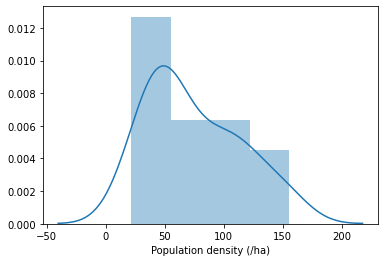

In [60]:
sns.distplot(boroughs['Population density (/ha)'].dropna());

<You can create categorical plots with `catplot`. There are categorical scatter plots, distribution plots and estimate plots. The `kind` parameter selects the function to use, for instance box, violin, swarm ,bar, stripplot and boxen.
    
The default representation in catplot() uses a scatter plot:

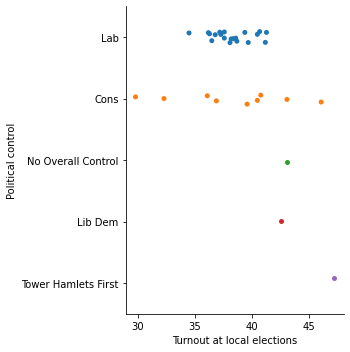

In [61]:
sns.catplot(x='Turnout at local elections', y='Political control', data=boroughs);

Also try `kind="swarm"`, `kind="box"` or `kind="violin"`:

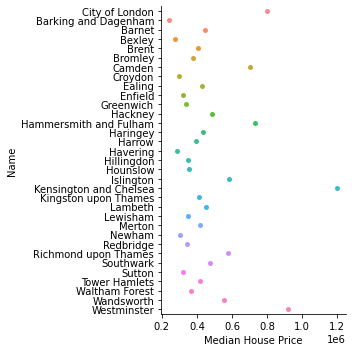

In [62]:
sns.catplot(x='Median House Price', y='Name', kind='swarm', data=boroughs);

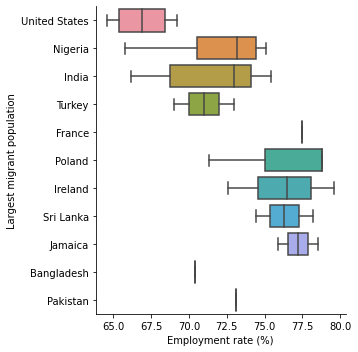

In [63]:
sns.catplot(x='Employment rate (%)', y='Largest migrant population', kind="box", data=boroughs);

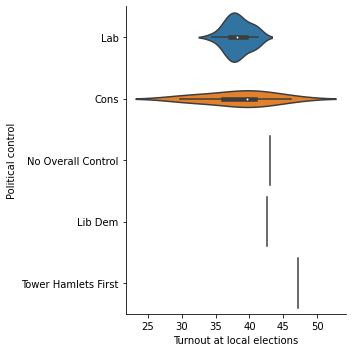

In [64]:
sns.catplot(x='Turnout at local elections', y='Political control', kind="violin", data=boroughs);

<div class="alert alert-success">
 <b>EXERCISE</b>
 <ol>
  <li>Create two histograms that compare the Gross Annual pay for Male and Female Employees using `.plot.hist()`</li>
  <li>Create a bar plot comparing the median house prices for different boroughs</li>
  <li>Create a scatter plot comparing the Median House price and percentage of area that is greenspace </li>
 </ol> 
   </div> 
   
 <ul></ul> 
 <ul></ul> 
 <ul></ul> 
 
 > *Tips*:
-  To add two histograms to one plot you can repeat `.plot()` in the same cell 
-  Add a legend by assiging each histogram to an object `ax`, which is used to create a legend
-  To customise the size of your maps, use the example of `[fig, ax]`, which customises the figsize for each map in other examples above 

**Create two histograms that compare the Gross Annual pay for Male and Female Employees using `.plot.hist()`**

In [65]:
# your answer:


In [ ]:
# %load https://raw.githubusercontent.com/IBM/python-and-analytics/master/data/answers/answer4.py
ax = boroughs['Gross Pay (Female)'].plot.hist(bins=15,figsize=(10,5),alpha=0.5);
ax = boroughs['Gross Pay (Male)'].plot.hist(bins=15,figsize=(10,5),alpha=0.5);
ax.legend(['female','male']);


**Create a bar plot comparing the median house prices for different boroughs**

In [67]:
# your answer:


In [ ]:
# %load https://raw.githubusercontent.com/IBM/python-and-analytics/master/data/answers/answer5.py
[fig, ax] = plt.subplots(1, figsize=(7,7))
sns.barplot(x='Median House Price', y='Name', data=boroughs, ax=ax);


**Create a scatter plot comparing the Median House price and percentage of greenspace area** 

In [69]:
# your answer:


In [ ]:
# %load https://raw.githubusercontent.com/IBM/python-and-analytics/master/data/answers/answer6.py
[fig, ax] = plt.subplots(1, figsize=(7,7))
ax=sns.scatterplot(y='Median House Price', x='Greenspace (%)', data=boroughs,ax=ax);


Now that you have explored some real data with Python and Pandas keep learning by exploring more of this dataset or create a new notebook and start with your own data. The data used here is a clean dataset, which is definitely not always the case, so stay alert to always check all your data. 

<div class="alert alert-info" style="font-size:100%">
<b>To learn more about Pandas start with this <a href="http://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html">10 minute introduction</a><br>
</div>

## Optional Excercises and further learning

If you finish early:

2. Try to create other plots. Have a look at the [Pandas plot examples](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) or the [Seaborn gallery](https://seaborn.pydata.org/examples/index.html) for inspiration.  
3. Or load one of your own datasets into a new notebook and play around with the data to practice what you have learned. You can use the free account you created today for your own projects as well! 
4. Have a look at these Pandas workshops and book: <br>
4.1. [Pandas workshop by Alexander Hensdorf](https://github.com/alanderex/pydata-pandas-workshop) <br>
4.2. [Pandas tutorial by Joris van den Bossche](https://github.com/jorisvandenbossche/pandas-tutorial) <br>
4.3. [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) <br>

### Authors

Margriet Groenendijk is a Data & AI Developer Advocate for IBM. She develops and presents talks and workshops about data science and AI. She is active in the local developer communities through attending, presenting and organising meetups and conferences. She has a background in climate science where she explored large observational datasets of carbon uptake by forests during her PhD, and global scale weather and climate models as a postdoctoral fellow. 

Yamini Rao is a Developer Advocate for IBM. She compiles developer scenarios, workshops and training material based on IBM Cloud technologies to demonstrate value. She also works as a community manager, collaborating with local developer communites to organise workshops and meetups. She has a background in computer science and has worked extensively as an Implementation Engineer for various IBM Analytical tools. 

Copyright © 2020 IBM. This notebook and its source code are released under the terms of the MIT License.